# eda001
基本的なデータ確認

In [2]:
import os
import sys
sys.path.append('/home/kaggler/.local/lib/python3.8/site-packages')
from dotenv import load_dotenv
load_dotenv
sys.path.append(os.getenv('UTILS_PATH'))
import pandas as pd
import matplotlib.pyplot as plt; plt.style.use("ggplot")
import seaborn as sns
from sklearn.metrics.pairwise import haversine_distances
import itertools

In [3]:
import builtins
import types

def imports():
    for name, val in globals().items():
        # module imports
        if isinstance(val, types.ModuleType):
            yield name, val

            # functions / callables
        if hasattr(val, '__call__'):
            yield name, val


def noglobal(f):
    '''
    ref: https://gist.github.com/raven38/4e4c3c7a179283c441f575d6e375510c
    '''
    return types.FunctionType(f.__code__,
                              dict(imports()),
                              f.__name__,
                              f.__defaults__,
                              f.__closure__
                              )

In [4]:
INPUT_DIR = os.getenv('INPUT_DIR')
OUTPUT_DIR = os.getenv('OUTPUT_DIR')
#exp_name = os.path.dirname(__file__).split('/')[-1]
exp_name = 'eda001'
os.makedirs(OUTPUT_DIR + exp_name, exist_ok=True)

In [5]:
train = pd.read_csv(INPUT_DIR + 'train.csv')

In [6]:
df = train[train["country"]=="JP"]

In [7]:
df[df["state"].isin(["大阪府", "京都府"])].to_csv("check.csv")

In [8]:
train[train["id"]=="E_799fa3d67b87c6"]

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
541279,E_799fa3d67b87c6,阪急梅田コビッグマン前,34.704545,135.498537,芝田1-1-3,大阪市北区,大阪府,530-0012,JP,NaN,NaN,Event Spaces,P_552645f30e3fd6


In [5]:
(train.isnull().sum() / len(train)) * 100

id                    0.000000
name                  0.000088
latitude              0.000000
longitude             0.000000
address              34.827610
city                 26.272027
state                36.931996
zip                  52.284837
country               0.000966
url                  76.490940
phone                69.893626
categories            8.632417
point_of_interest     0.000000
dtype: float64

In [6]:
train.nunique()

id                   1138812
name                  842086
latitude             1121701
longitude            1080273
address               558154
city                   68105
state                  17596
zip                    93329
country                  221
url                   171222
phone                 293454
categories             52578
point_of_interest     739972
dtype: int64

(array([7.02746e+05, 3.01390e+04, 2.51700e+03, 2.16600e+03, 8.88000e+02,
        2.61000e+02, 3.75000e+02, 2.23000e+02, 6.80000e+01, 1.20000e+02,
        9.10000e+01, 4.10000e+01, 6.40000e+01, 3.80000e+01, 2.20000e+01,
        3.60000e+01, 2.80000e+01, 1.40000e+01, 1.70000e+01, 1.80000e+01,
        4.00000e+00, 7.00000e+00, 5.00000e+00, 3.00000e+00, 8.00000e+00,
        4.00000e+00, 5.00000e+00, 6.00000e+00, 4.00000e+00, 1.00000e+00,
        4.00000e+00, 3.00000e+00, 4.00000e+00, 3.00000e+00, 3.00000e+00,
        1.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00, 3.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00

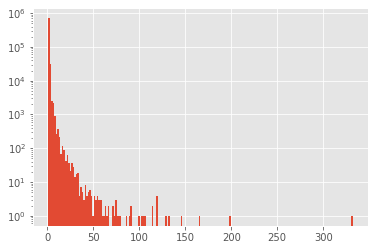

In [7]:
plt.hist(train['point_of_interest'].value_counts(), bins=200, log=True)

In [8]:
train['point_of_interest'].value_counts()

P_fb339198a31db3    332
P_3a3fbd26e16269    199
P_f70a0977377171    166
P_9290e406eb58ac    145
P_fbe61733fcdebe    132
                   ... 
P_ed44fbd056eb4d      1
P_6601e86230f550      1
P_36404ebf8565ee      1
P_3270f1f5b135b9      1
P_ea6578bf39b406      1
Name: point_of_interest, Length: 739972, dtype: int64

In [9]:
train[train['point_of_interest'] == 'P_fb339198a31db3']

,id,name,latitude,longitude,address,city,state,zip,country,url,phone,categories,point_of_interest
10820,E_02761e40f68230,Sukarno Hatta airport,-7.329110,108.213608,NaN,NaN,NaN,NaN,ID,NaN,NaN,Airport Terminals,P_fb339198a31db3
14686,E_0351377fc6b71d,Bandara Soekarno Hatta,-6.143365,106.729291,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,P_fb339198a31db3
19520,E_046132a06d8bc5,Bandar Djakarta,-6.117818,106.855710,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,P_fb339198a31db3
21192,E_04c39deab3aba2,"Bandara Soekarnao Hatta...^^,",-6.234635,106.874453,NaN,NaN,NaN,NaN,ID,NaN,NaN,Airport Terminals,P_fb339198a31db3
21433,E_04d15c990bfd9e,Bandara Soekarno Hatta,1.541611,98.915245,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,P_fb339198a31db3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120868,E_fbfa341173cef3,Soekarno Hatta International Airport,-7.952919,112.628568,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,P_fb339198a31db3
1133655,E_fed28e5ada5e81,Otw Soetta,-6.261004,106.767409,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,P_fb339198a31db3
1137194,E_ffa093e04175aa,Kawasan Soetta,-6.109597,106.653188,NaN,NaN,NaN,NaN,ID,NaN,NaN,NaN,P_fb339198a31db3
1138441,E_ffe8c72a51f9c6,Bandara Soekarno Hatta,-6.130148,106.657134,NaN,Jakarta,NaN,NaN,ID,NaN,NaN,Buildings,P_fb339198a31db3


# マッチングペアリスト作成

In [10]:
id1s = []
id2s = []
for poi, df in train[["id", "point_of_interest"]].groupby("point_of_interest"):
    if len(df) > 1:
        for id1,id2 in itertools.combinations(df['id'].values, 2):
            id1s.append(id1)
            id2s.append(id2)

match_list = pd.DataFrame()
match_list['id1'] = id1s
match_list['id2'] = id2s

train1 = train.copy()
train1.columns = train.columns + '1'
train2 = train.copy()
train2.columns = train.columns + '2'

match_list = match_list.merge(train1, on='id1', how='inner')
match_list = match_list.merge(train2, on='id2', how='inner')

In [11]:
cols = []
for c in train.columns:
    cols.append(c+'1')
    cols.append(c+'2')
match_list = match_list[cols].copy()

In [12]:
match_list.to_csv(OUTPUT_DIR + f'{exp_name}/match_list.csv', index=False)

In [13]:
match_list

,id1,id2,name1,name2,latitude1,latitude2,longitude1,longitude2,address1,address2,...,country1,country2,url1,url2,phone1,phone2,categories1,categories2,point_of_interest1,point_of_interest2
0,E_3b8a876a004093,E_7b12ba037d7af8,Taichung International Airport (RMQ) (臺中國際機場),Taichung Airport Int'l Terminal,24.254227,24.254209,120.599732,120.599844,中清路42號,NaN,...,TW,TW,http://www.tca.gov.tw,NaN,426155000,NaN,"Airports, Military Bases",Airport Terminals,P_00001c309a5e0a,P_00001c309a5e0a
1,E_3b8a876a004093,E_a66af820515384,Taichung International Airport (RMQ) (臺中國際機場),Taichung International Airport,24.254227,24.255480,120.599732,120.600316,中清路42號,NaN,...,TW,TW,http://www.tca.gov.tw,NaN,426155000,NaN,"Airports, Military Bases",Airports,P_00001c309a5e0a,P_00001c309a5e0a
2,E_7b12ba037d7af8,E_a66af820515384,Taichung Airport Int'l Terminal,Taichung International Airport,24.254209,24.255480,120.599844,120.600316,NaN,NaN,...,TW,TW,NaN,NaN,NaN,NaN,Airport Terminals,Airports,P_00001c309a5e0a,P_00001c309a5e0a
3,E_3b8a876a004093,E_c1f62f2aa41ff6,Taichung International Airport (RMQ) (臺中國際機場),台中清泉機場,24.254227,24.214837,120.599732,120.622577,中清路42號,NaN,...,TW,TW,http://www.tca.gov.tw,NaN,426155000,NaN,"Airports, Military Bases",Airports,P_00001c309a5e0a,P_00001c309a5e0a
4,E_7b12ba037d7af8,E_c1f62f2aa41ff6,Taichung Airport Int'l Terminal,台中清泉機場,24.254209,24.214837,120.599844,120.622577,NaN,NaN,...,TW,TW,NaN,NaN,NaN,NaN,Airport Terminals,Airports,P_00001c309a5e0a,P_00001c309a5e0a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950498,E_a7aa308dd4169b,E_ec26c606217b82,Ppp-Aps Group,PPP,51.143466,51.143397,4.558219,4.558140,Ondernemerstraat 11,Ondernemersstraat 11,...,BE,BE,http://www.ppp-apsgroup.eu,NaN,NaN,NaN,"Factories, Offices",Offices,P_fffef398f6f50c,P_fffef398f6f50c
950499,E_581a04f7b94fda,E_d2eb367d863c79,Centrum Bar Zaandam,Centrum Bar Zaandam,52.433176,52.438678,4.829669,4.824190,Dam 44,NaN,...,NL,NL,NaN,NaN,NaN,NaN,Bars,Bars,P_ffff001f71e321,P_ffff001f71e321
950500,E_47d063fddd9115,E_ca42d07c618f1c,Darty,DARTY Epinal,48.191717,48.191275,6.474805,6.474963,NaN,Avenue des Terres Saint-Jean,...,FR,FR,NaN,https://magasin.darty.com/72-darty-epinal,NaN,+33892011010,Electronics Stores,"Electronics Stores, Furniture / Home Stores",P_ffff287983c417,P_ffff287983c417
950501,E_12c3aee0fd46bf,E_62e191be55a951,Doggis,Doggis,-23.580388,-23.580677,-46.594376,-46.594296,NaN,Mooca Plaza Shopping,...,BR,BR,NaN,http://www.doggis.com.br,NaN,NaN,Hot Dog Joints,"Hot Dog Joints, Fast Food Restaurants",P_ffffa5ef8f6b07,P_ffffa5ef8f6b07


In [14]:
print('PoIが同一なペアでの各列の一致度')
total_len = len(match_list)
for c in train.columns:
    match_len = len(match_list[match_list[c+'1'] == match_list[c+'2']])
    match_rate = match_len / total_len
    print(f'{c} | match={match_len}    ' + '{:.2f}'.format(match_rate*100) + '%')


PoIが同一なペアでの各列の一致度
id | match=0    0.00%
name | match=169597    17.84%
latitude | match=10031    1.06%
longitude | match=10850    1.14%
address | match=66837    7.03%
city | match=206263    21.70%
state | match=160966    16.93%
zip | match=113053    11.89%
country | match=929260    97.77%
url | match=22883    2.41%
phone | match=29427    3.10%
categories | match=276314    29.07%
point_of_interest | match=950503    100.00%


In [15]:
print('PoIが同一なペアでの各列の一致度(Null除去)')
for c in train.columns:
    tmp = match_list[[c+'1', c+'2']].copy()
    tmp = tmp.dropna()
    total_len = len(tmp)
    match_len = len(tmp[tmp[c+'1'] == tmp[c+'2']])
    match_rate = match_len / total_len
    print(f'{c} | match={match_len}    ' + '{:.2f}'.format(match_rate*100) + '%')

PoIが同一なペアでの各列の一致度(Null除去)
id | match=0    0.00%
name | match=169597    17.84%
latitude | match=10031    1.06%
longitude | match=10850    1.14%
address | match=66837    27.03%
city | match=206263    66.56%
state | match=160966    72.01%
zip | match=113053    79.41%
country | match=929260    97.77%
url | match=22883    46.35%
phone | match=29427    43.03%
categories | match=276314    44.86%
point_of_interest | match=950503    100.00%


In [16]:
country_not_match = match_list[match_list['country1']!=match_list['country2']].copy()

In [17]:
country_not_match

,id1,id2,name1,name2,latitude1,latitude2,longitude1,longitude2,address1,address2,...,country1,country2,url1,url2,phone1,phone2,categories1,categories2,point_of_interest1,point_of_interest2
4604,E_c7aec90ed1fbcb,E_e426513eed475f,Caffé bene,Caffe Bene,37.511917,37.511836,127.108284,127.108704,송파구 석촌호수로 298,송파구 송파동 58-1,...,KR,XX,http://www.caffebene.co.kr,NaN,264711223,264711223,Coffee Shops,Cafés,P_0143d51b18de51,P_0143d51b18de51
4823,E_1c48fa5b46147b,E_dbd95522db1d70,タイルショップ深大寺,INAX TILE SHOP 深大寺,35.668907,35.668972,139.544436,139.544507,NaN,深大寺元町5-2-4,...,XX,JP,NaN,NaN,NaN,0424881726,Arts & Crafts Stores,Arts & Crafts Stores,P_01598bf7b68a04,P_01598bf7b68a04
5714,E_1e6a6ae482a943,E_e8862a2f5d5106,味千拉面(罗湖火车站店),Ajisen Ramen 味千拉麵,22.531425,22.534213,114.118291,114.113230,罗湖火车站大楼A区夹层1号铺,罗湖火车站大楼A区夹层1号铺,...,HK,CN,NaN,http://www.ajisen.com.cn,NaN,NaN,Ramen Restaurants,Ramen Restaurants,P_01c141dbdd784f,P_01c141dbdd784f
7042,E_034677909aaddd,E_3787f8ae0b9a3c,Sydney Opera House,Opera House Sydney Australia,-33.860427,-6.232538,151.212638,106.834578,NaN,NaN,...,AU,ID,NaN,NaN,NaN,NaN,NaN,General Entertainment,P_01f7c36695177b,P_01f7c36695177b
7043,E_151c53847243da,E_3787f8ae0b9a3c,sydney opera house,Opera House Sydney Australia,-37.807294,-6.232538,144.968268,106.834578,NaN,NaN,...,AU,ID,NaN,NaN,NaN,NaN,NaN,General Entertainment,P_01f7c36695177b,P_01f7c36695177b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948680,E_95b5cb0381c604,E_a2127407f93949,"Oooh, Big Waterfall",Niagara Falls New York Side,43.079536,43.086931,-79.075905,-79.063609,NaN,NaN,...,CA,US,NaN,NaN,NaN,NaN,"Waterfalls, Monuments / Landmarks, Waterfronts",NaN,P_ff99db0b22dcde,P_ff99db0b22dcde
948681,E_2a6afcb2d5d923,E_c03e0bfd4f7edf,niagara falls,Niagara Fall,43.080078,42.999619,-79.069185,-78.875581,NaN,NaN,...,CA,US,NaN,NaN,NaN,NaN,Other Great Outdoors,NaN,P_ff99db0b22dcde,P_ff99db0b22dcde
948683,E_95b5cb0381c604,E_c03e0bfd4f7edf,"Oooh, Big Waterfall",Niagara Fall,43.079536,42.999619,-79.075905,-78.875581,NaN,NaN,...,CA,US,NaN,NaN,NaN,NaN,"Waterfalls, Monuments / Landmarks, Waterfronts",NaN,P_ff99db0b22dcde,P_ff99db0b22dcde
948758,E_89bc6a845586a4,E_b4ee31da0df96f,Дикси,Дикси,55.133802,38.724700,38.727842,55.134200,"п. Радужный, пом.1","п. Радужный, пом.1",...,RU,TM,http://dixy.ru,http://dixy.ru,NaN,NaN,Convenience Stores,Convenience Stores,P_ffa34ef8a53f2f,P_ffa34ef8a53f2f


In [18]:
country_not_match.to_csv(OUTPUT_DIR + f'{exp_name}/country_not_match.csv', index=False)

In [36]:
import collections

country_not_match_pair = []
country_not_match = country_not_match.reset_index(drop=True)
for i in range(len(country_not_match)):
    country1 = country_not_match.at[i, 'country1']
    country2 = country_not_match.at[i, 'country2']
    if (country1 == country1) and (country2 == country2):
        pair = sorted([country1, country2])
        pair = pair[0] + ' - ' + pair[1]
        country_not_match_pair.append(pair)

c = collections.Counter(country_not_match_pair)
print(c.most_common(100))

[('ID - MY', 2549), ('FR - ID', 2329), ('ID - SG', 1603), ('BY - RU', 987), ('AE - RU', 842), ('ID - KR', 684), ('EE - RU', 573), ('ID - US', 510), ('ID - TH', 446), ('RU - UA', 429), ('GR - TR', 425), ('MY - SG', 399), ('GB - ID', 371), ('BE - NL', 356), ('ID - VN', 338), ('ID - KH', 325), ('HK - ID', 263), ('BE - GB', 261), ('ID - XX', 259), ('FR - TR', 256), ('ID - JP', 252), ('FR - SA', 236), ('BY - UA', 217), ('ID - SA', 169), ('ID - TR', 163), ('CN - ID', 152), ('ID - PH', 152), ('FR - US', 126), ('CN - MO', 123), ('FR - NL', 118), ('FR - MY', 118), ('BE - NO', 116), ('AE - BY', 111), ('BN - ID', 104), ('DE - ID', 103), ('KR - XX', 95), ('GB - NL', 91), ('BR - FR', 79), ('ID - NL', 78), ('SA - US', 77), ('GB - TR', 77), ('IR - TR', 74), ('HK - MO', 72), ('ES - FR', 70), ('ID - TW', 69), ('CN - HK', 68), ('AU - ID', 65), ('CA - US', 63), ('IR - RU', 60), ('BG - FR', 59), ('FR - HU', 59), ('FR - NO', 59), ('AU - FR', 59), ('AR - FR', 59), ('FR - KW', 59), ('AU - MY', 57), ('BE - DE

In [37]:
train['country'].value_counts()

US    245284
TR    115177
ID    110796
JP     70032
TH     58808
       ...  
BV         1
GY         1
PM         1
SS         1
VU         1
Name: country, Length: 221, dtype: int64

In [33]:
country_not_match_pair

['KR - XX',
 'JP - XX',
 'CN - HK',
 'AU - ID',
 'AU - ID',
 'AU - ID',
 'AU - ID',
 'AU - ID',
 'AU - ID',
 'AU - ID',
 'CN - MO',
 'FR - MC',
 'CH - IT',
 'MK - RS',
 'MK - RS',
 'MK - RS',
 'TR - US',
 'BZ - MX',
 'BZ - MX',
 'BZ - MX',
 'PH - US',
 'PH - US',
 'CN - MO',
 'ES - PH',
 'ES - PH',
 'ES - PH',
 'ES - PH',
 'DE - TR',
 'AQ - BR',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'KW - MY',
 'RU - TM',
 'RU - TM',
 'ID - MY',
 'ID - MY',
 'ID - MY',
 'ID - MY',
 'ID - MY',
 'ID - MY',
 'ID